# Machine Learning (Aprendizaje Automático)
## Clasificación

¿Qué es la clasificación?
Los algoritmos de aprendizaje automático supervisados definen modelos que capturan las relaciones entre los datos. La clasificación es un área de aprendizaje automático supervisado que intenta predecir a qué clase o categoría pertenece una entidad, en función de sus características.

## Clasificación Binaria

Suponga que, en nuestro problema de las notas de curso, queremos intentar predecir si el estudiante gana o no el curso, con base en algunas de las características mencionadas. Esto es lo que llamamos un problema de clasificación. Para intentar encontrar una hipótesis a un problema de este tipo, podríamos usar regresión lineal o polinomial (es el único que manejamos) y mapear todas las predicciones mayores de un cierto valor como 1 y todas las menores como 0. Sin embargo, este método no funciona bien porque la clasificación no es en realidad una función de este tipo.

El problema de clasificación es como el problema de regresión, excepto que los valores que ahora queremos predecir toman solo una pequeña cantidad de valores discretos. Por ahora, nos centraremos en el problema de clasificación binaria en el que, y puede tomar solo dos valores, 0 y 1.

__Ejemplo:__ Usamos el paquete `sklearn` para generar un conjunto de datos de prueba, y sobre estos haremos el análisis.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [16]:
#Importo make_classification
from sklearn.datasets import make_classification
X, y = make_classification(n_features=2, n_redundant=0, 
                           n_informative=2, random_state=1, 
                           n_clusters_per_class=2,n_samples=100)

[]

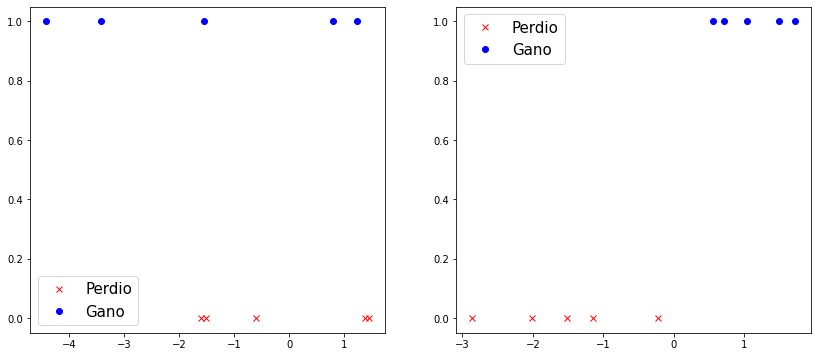

In [15]:
# Grafiquemos
fig, ax = plt.subplots(1,2,figsize=(14, 6))
#ax1.set(xlabel="Horas de estudio semanal")
# los valores de x e y
ax[0].plot(X[:,0][y==0],y[y==0],'x',color='red',label='Perdio')
ax[0].plot(X[:,0][y==1],y[y==1],'o',color='blue',label='Gano')
ax[0].legend(fontsize=15)
ax[1].plot(X[:,1][y==0],y[y==0],'x',color='red',label='Perdio')
ax[1].plot(X[:,1][y==1],y[y==1],'o',color='blue',label='Gano')
ax[1].legend(fontsize=15)

plt.plot()

[]

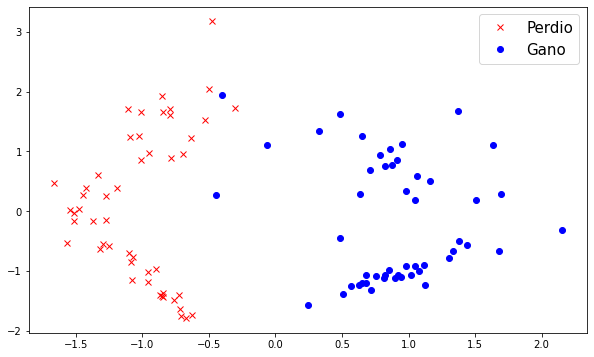

In [4]:
# Grafiquemos
fig1, ax1 = plt.subplots(figsize=(10, 6))
#ax1.set(xlabel="Horas de estudio semanal")
# los valores de x e y
ax1.plot(X[:,0][y==0],X[:,1][y==0],'x',color='red',label='Perdio')
ax1.plot(X[:,0][y==1],X[:,1][y==1],'o',color='blue',label='Gano')
ax1.legend(fontsize=15)
plt.plot()

## Regresión logística

La hipótesis $h_\theta(x)$ debe de satisfacer $0 \leq h_\theta(x) \leq 1$, y esto se logra usando la _Función logística_  (también llamada Función sigmoidea)

$$h_\theta(x) = \frac{1}{1+e^{\theta^Tx}}$$

Sabemos que hay muchas funciones continuas que generan valores entre 0 y 1. ¿Por qué elegimos solo la función logística, por qué no cualquier otra? En realidad, existe una clase más amplia de algoritmos denominados _Modelos lineales generalizados_ de los cuales este es un caso especial. 

A continuación se ve una gráfica de la función

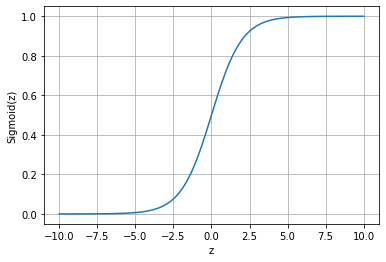

In [5]:
def sigmoid(z):
    '''Funcion Sigmoidea
        Args:
            - Z: objeto de de python compatible con numpy
        Out:
            - Sigmoidea aplicada a z 
    '''
    return 1/(1 + np.exp(-z))

z = np.linspace(-10, 10, 100)
Y = sigmoid(z)
  
plt.plot(z, Y)
plt.xlabel("z")
plt.ylabel("Sigmoid(z)")
plt.grid(True)
plt.show()

La función Sigmoide, que se muestra aquí, asigna cualquier número real al intervalo (0, 1), lo que la hace útil para transformar una función de valor arbitrario en una función más adecuada para la clasificación.

$h_{\theta}(x)$ se interpreta como la probabilidad de que la salida sea $1$, luego $h_{\theta}(x)=P(y|x;\theta)$, que se lee __"Probabilidad de $y$ dados $x$ parametrizado por $\theta$"__

__Ejemplo:__ si $h_\theta(x) = 0.7$ nos da una probabilidad del $70\%$ de que nuestra salida sea 1. Nuestra probabilidad de que nuestra predicción sea 0 es solo el complemento de nuestra probabilidad de que sea 1.

## Función de costo para la regresión logística

Para cada algoritmo de aprendizaje automático, necesitamos una función de costo o pérdida, que queremos minimizar para determinar los parámetros óptimos que nos ayudarán a hacer las mejores predicciones. Para la regresión lineal, tuvimos el error cuadrático medio como función de pérdida. Para un problema de clasificación binaria, necesitamos poder generar la probabilidad de que $y$ sea 1, luego podemos determinar la probabilidad de que $y$ sea 0 o viceversa.

La función de costo para la regresión logística esta definida como (loglikelihood)
$$
Cost\left(h_{\theta}(x),y\right)=\begin{cases}
-\log(h_{\theta}(x)) & si~~y=1\\
\\
-\log(1-h_{\theta}(x)) & si~~y=0
\end{cases}
$$

o de forma más compacta
$$
Cost\left(h_{\theta}(x),y\right)=-y\log(h_{\theta}(x))-(1-y)\log(1-h_{\theta}(x))
$$

note que la función de costo se acerca a 0 cuando predecimos correctamente, es decir, cuando $y = 0$ y $h_{\theta}(x) = 0$ o, $y = 1$ y $h_{\theta}(x) = 1$, y la función de pérdida se acerca al infinito si predecimos incorrectamente, es decir , cuando $y = 0$ pero $h_{\theta}(x) = 1$ o, $y = 1$ pero $h_{\theta}(x) = 1$.

Luego cuando se implementa para una cantidad de datos $m$, se escribe

$$
J(\theta)=\frac{1}{m}\sum^m_{i=1}[-y^{(i)}\log(h_{\theta}(x^{(i)}))-(1-y^{(i)})\log(1-h_{\theta}(x^{(i)}))]
$$

o de manera vectorizada

$$
J(\theta)=\frac{1}{m}(-y^T\log(h)-(1-y)^T\log(1-h))
$$

con $\log$ función vectorial. A continuación, se define dicha función para el caso ejemplo

In [6]:
def Cost(y, y_hip):
    '''Funcion Costo
    Args:
        - y ( numpy float array): Vector con los valores del dominio de entrenamiento
        - y_hip respuesta generada por la hipotesis
    Out:
        - Costo 
    '''
    m=y.shape[0]
    cost = -np.sum((1/m)*(y.T.dot(np.log(y_hip)))+(1-y).T.dot(np.log(sigmoid(1-y_hip))))
    return cost

__NOTA:__ En el caso de regresión logística es muy importante que todas las variables estén normalizadas, pues van a pasar por la función sigmoide.

In [7]:
def normalize(X):
    '''Funcion Costo
    Args:
    - X ( numpy float array): Matriz con los valores del dominio de entrenamiento
    Out:
    - X normalizado 
    '''    
    # m-> numero de ejemplos de entrenamiento
    # n-> numero de caracteristicas (variables)
    m, n = X.shape;

    # Normalizando.
    for i in range(n):
        X = (X - X.mean(axis=0))/X.std(axis=0)

    return X

La minimización de esta función se hace a través de GD. La derivada de $J$ es la misma que en el caso de la regresión lineal, 
$$
\theta_j: = \theta_j -\frac{\alpha}{m}\sum_{i=1}^{m}(h(\theta^{(i)}) - y^{(i)}).x^{(i)}_j
$$
o en forma Vectorial

$$
\theta_j: = \theta_j-\frac{\alpha}{m}X^T(h_\theta(X)-y)
$$

pero debemos de tener en cuenta que $h_\theta(x) = \frac{1}{1+e^{x\theta}}$.

In [8]:
def GDRL(X_train,Y_train,Theta,alpha=0.001,steps=100):
    '''Gradient Descent para regresion logistica
        Args:
            - Theta (array float): parámetros iniciales
                Ejem: Theta = np.ones([1,2])
            - X_train (numpy float arrays): Matriz mxn con los valores del rango de entrenamiento
                n -> numero de caracteristicas, m->numero de ejemplos de entrenamiento
            - Y_train( numpy float array): Vector con los valores del dominio de entrenamiento 
            - alpha (float): learning rate
            - steps (int): numero de pasos
        Out:
            - Valor de Theta actualizado a la ultima iteracion (array float)
            - Historico del Thetha
            - Historico del costo
    '''
    n=X_train.shape[1]
    m=X_train.shape[0]
    #si entra como vector fila, lo pasa a columna (con n+1 filas)
    Theta_0=Theta.reshape(n+1,1)
    #si entra como vector fila, lo pasa a columna (con m filas)
    y=Y_train.reshape(m,1)
    #Normalizo los datos
    Xnom=normalize(X_train)
    #Anadimos los 1 correspondientes a los X_0
    X=np.c_[np.ones(m),Xnom]
    #Historial de Theta
    HistoThetaArray=[]
    #Primer valor
    HistoThetaArray.append(Theta_0)
    #historial Costo
    histoCostArray=[]
    #For por cada paso
    for i in range(steps):
        #Calculo el costo y al historial
        histoCostArray.append(Cost(y,sigmoid(X.dot(Theta_0))))
        #Actualizo los valores de theta
        Theta_0 = Theta_0 - (alpha/m)*np.dot(X.T,sigmoid(X.dot(Theta_0)) - y)
        #Anado al historial
        HistoThetaArray.append(Theta_0)
        
    HistoTheta=np.array(HistoThetaArray)
    histoCost=np.array(histoCostArray)
        
    return Theta_0,HistoTheta,histoCost

In [9]:
Theta = np.array([0,0,0])
Theta_0,HistoTheta,histoCost = GDRL(X,y,Theta,alpha=0.01,steps=10000)
#histoCost

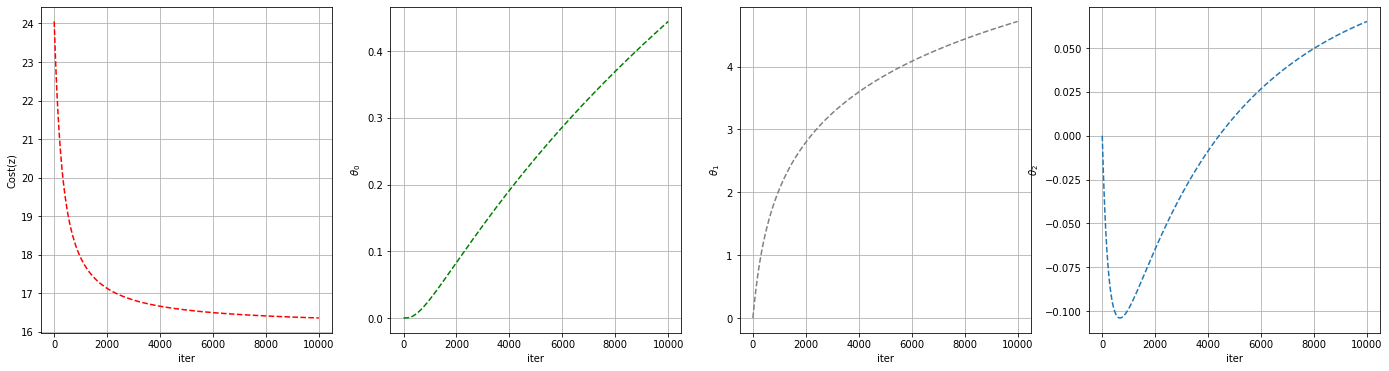

In [10]:
fig2, ax2 = plt.subplots(nrows=1, ncols=4,figsize=(24,6))
ax2[0].plot(histoCost,'--',color='red');
ax2[0].grid(True)
ax2[0].set(ylabel="Cost(z)",xlabel="iter")
ax2[1].plot(HistoTheta[:,0],'--',color='green');
ax2[1].set(ylabel=r"$\theta_0$",xlabel="iter")
ax2[1].grid(True)
ax2[2].plot(HistoTheta[:,1],'--',color='gray');
ax2[2].set(ylabel=r"$\theta_1$",xlabel="iter")
ax2[2].grid(True)
ax2[3].plot(HistoTheta[:,2],'--');
ax2[3].set(ylabel=r"$\theta_2$",xlabel="iter")
ax2[3].grid(True)
plt.show()

## Contornos de decisión

Si decidimos que si $h_\theta(x) \leq 0.5$ entonces $y=1$ entonces tendremos que 

$$\theta^Tx\leq 0 \Rightarrow y=1$$

$$\theta^Tx > 0 \Rightarrow y=0$$

A la función que genera esta escogencia de parámetros la llamaremos contornos de decisión. Luego una vez encontrado $\theta$ podemos ver este contorno (al menos para dos caracteristicas)

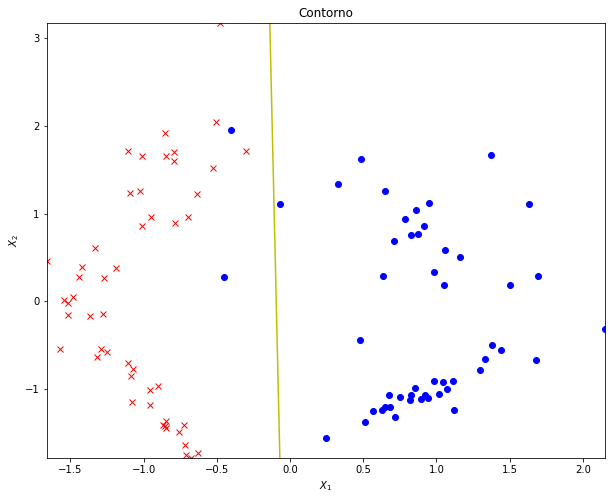

In [11]:
x1 = [min(X[:,0]), max(X[:,0])]
m = -Theta_0[1]/Theta_0[2]
c = -Theta_0[0]/Theta_0[2]
x2 = m*x1 + c
    
# Grafiquemos
fig, ax = plt.subplots(figsize=(10, 8))
#ax1.set(xlabel="Horas de estudio semanal")
# los valores de x e y

plt.xlim([X[:,0].min(), X[:,0].max()])
plt.ylim([X[:,1].min(), X[:,1].max()])

ax.plot(X[:,0][y==0],X[:,1][y==0],'x',color='red',label='Perdio')
ax.plot(X[:,0][y==1],X[:,1][y==1],'o',color='blue',label='Gano')
plt.xlabel(r"$X_1$")
plt.ylabel(r"$X_2$")
plt.title('Contorno')
plt.plot(x1, x2, 'y-')